## Size Calculating ##

Approach:
1. Threshold
2. FindContours
3. ContourArea?

In [2]:
# import python packages
import cv2
import numpy as np
import math
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
#from matplotlib import pyplot as plt

In [2]:
# import & display photos
img1 = cv2.imread("Images/Feasibility Study/blocks.jpg")
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

## Original Blocks Image
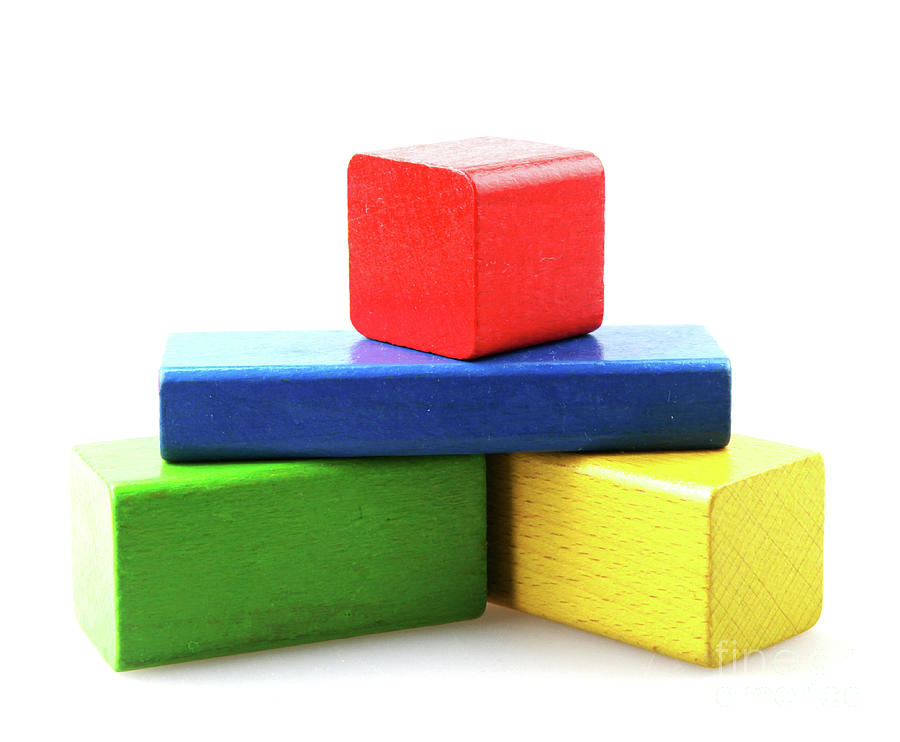

## Edge Detection Using Canny

In [3]:
# Edge Detection using canny
edge_img = cv2.imread("Images/Feasibility Study/shapes-01.jpg")
scale_percent = 40 # percent of original size
width = int(edge_img.shape[1] * scale_percent / 100)
height = int(edge_img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(edge_img, dim, interpolation = cv2.INTER_AREA)

In [4]:
#convert image to grayscale and blur image
edge_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
edge_blur = cv2.GaussianBlur(edge_gray, (3,3), 0)

# Canny Edge Detection
edges = cv2.Canny(image=edge_blur, threshold1=100, threshold2=200) # Canny Edge Detection
cv2.imwrite('Images/Feasibility Study/edges.jpg', edges)

True

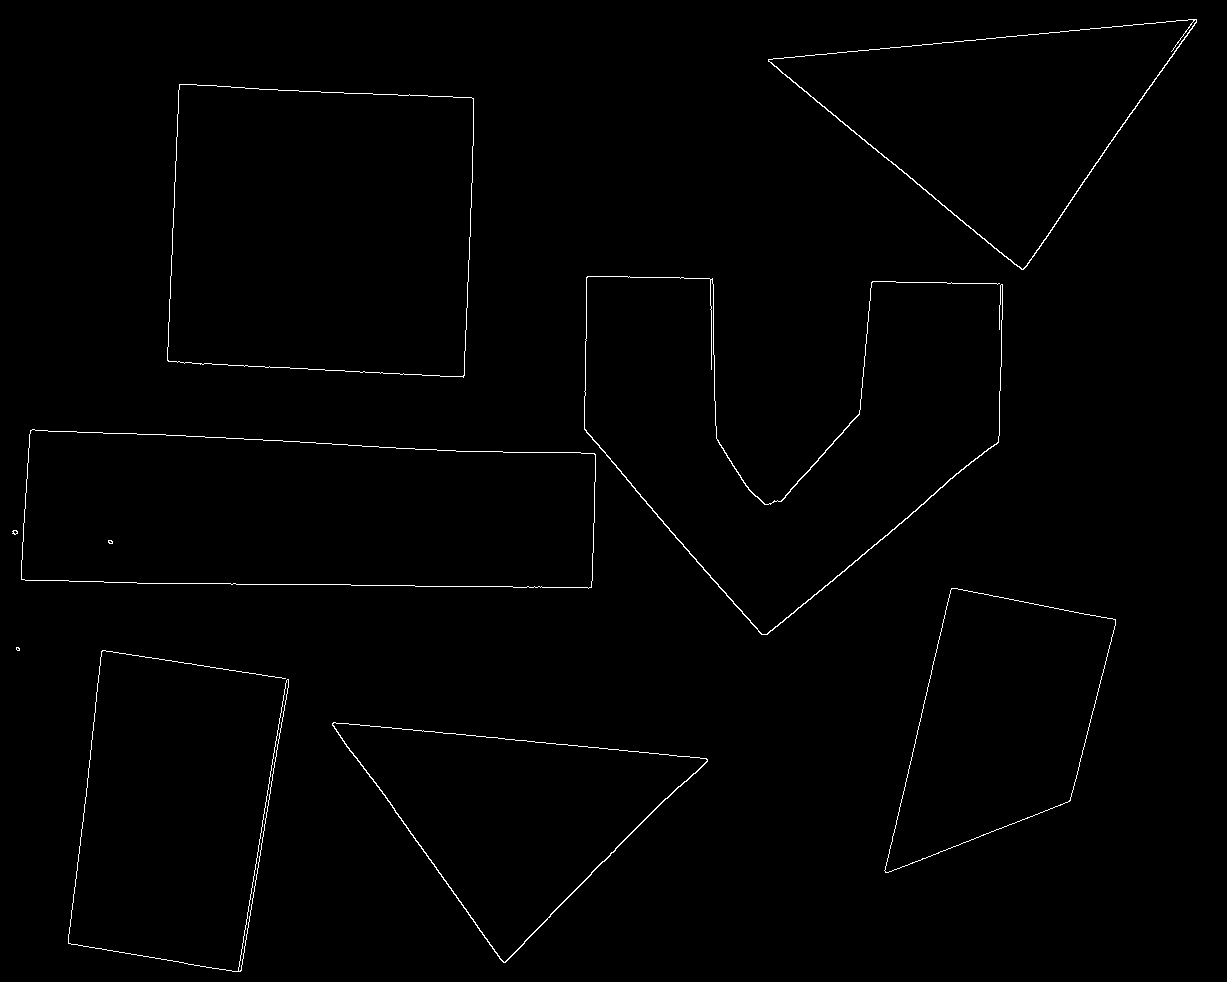

## Micrometers/pixel conversion 50x

In [40]:
# read in image & convert to hsv values
img1 = cv2.imread("Images/GRAPHENE/bl_1/bl_a_50x.jpg")
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# create a mask for white values only
mask1 = cv2.inRange(hsv, (0, 0, 255), (255, 255, 255))


cv2.imwrite('Images/GRAPHENE/bl_1/bl_a_50x_BW.jpg', mask1)

# count pixels kept in mask
width = sum(mask1.any(axis = 0) )
height = sum(mask1.any(axis = 1) )

# hypotenuse calculation in pixels
hyp = math.sqrt(width**2 + height**2)

# pixel to micrometer ratio
p2mm = 129.905/hyp
print(p2mm, 'micrometers/pixel')

0.17356186772925664 micrometers/pixel


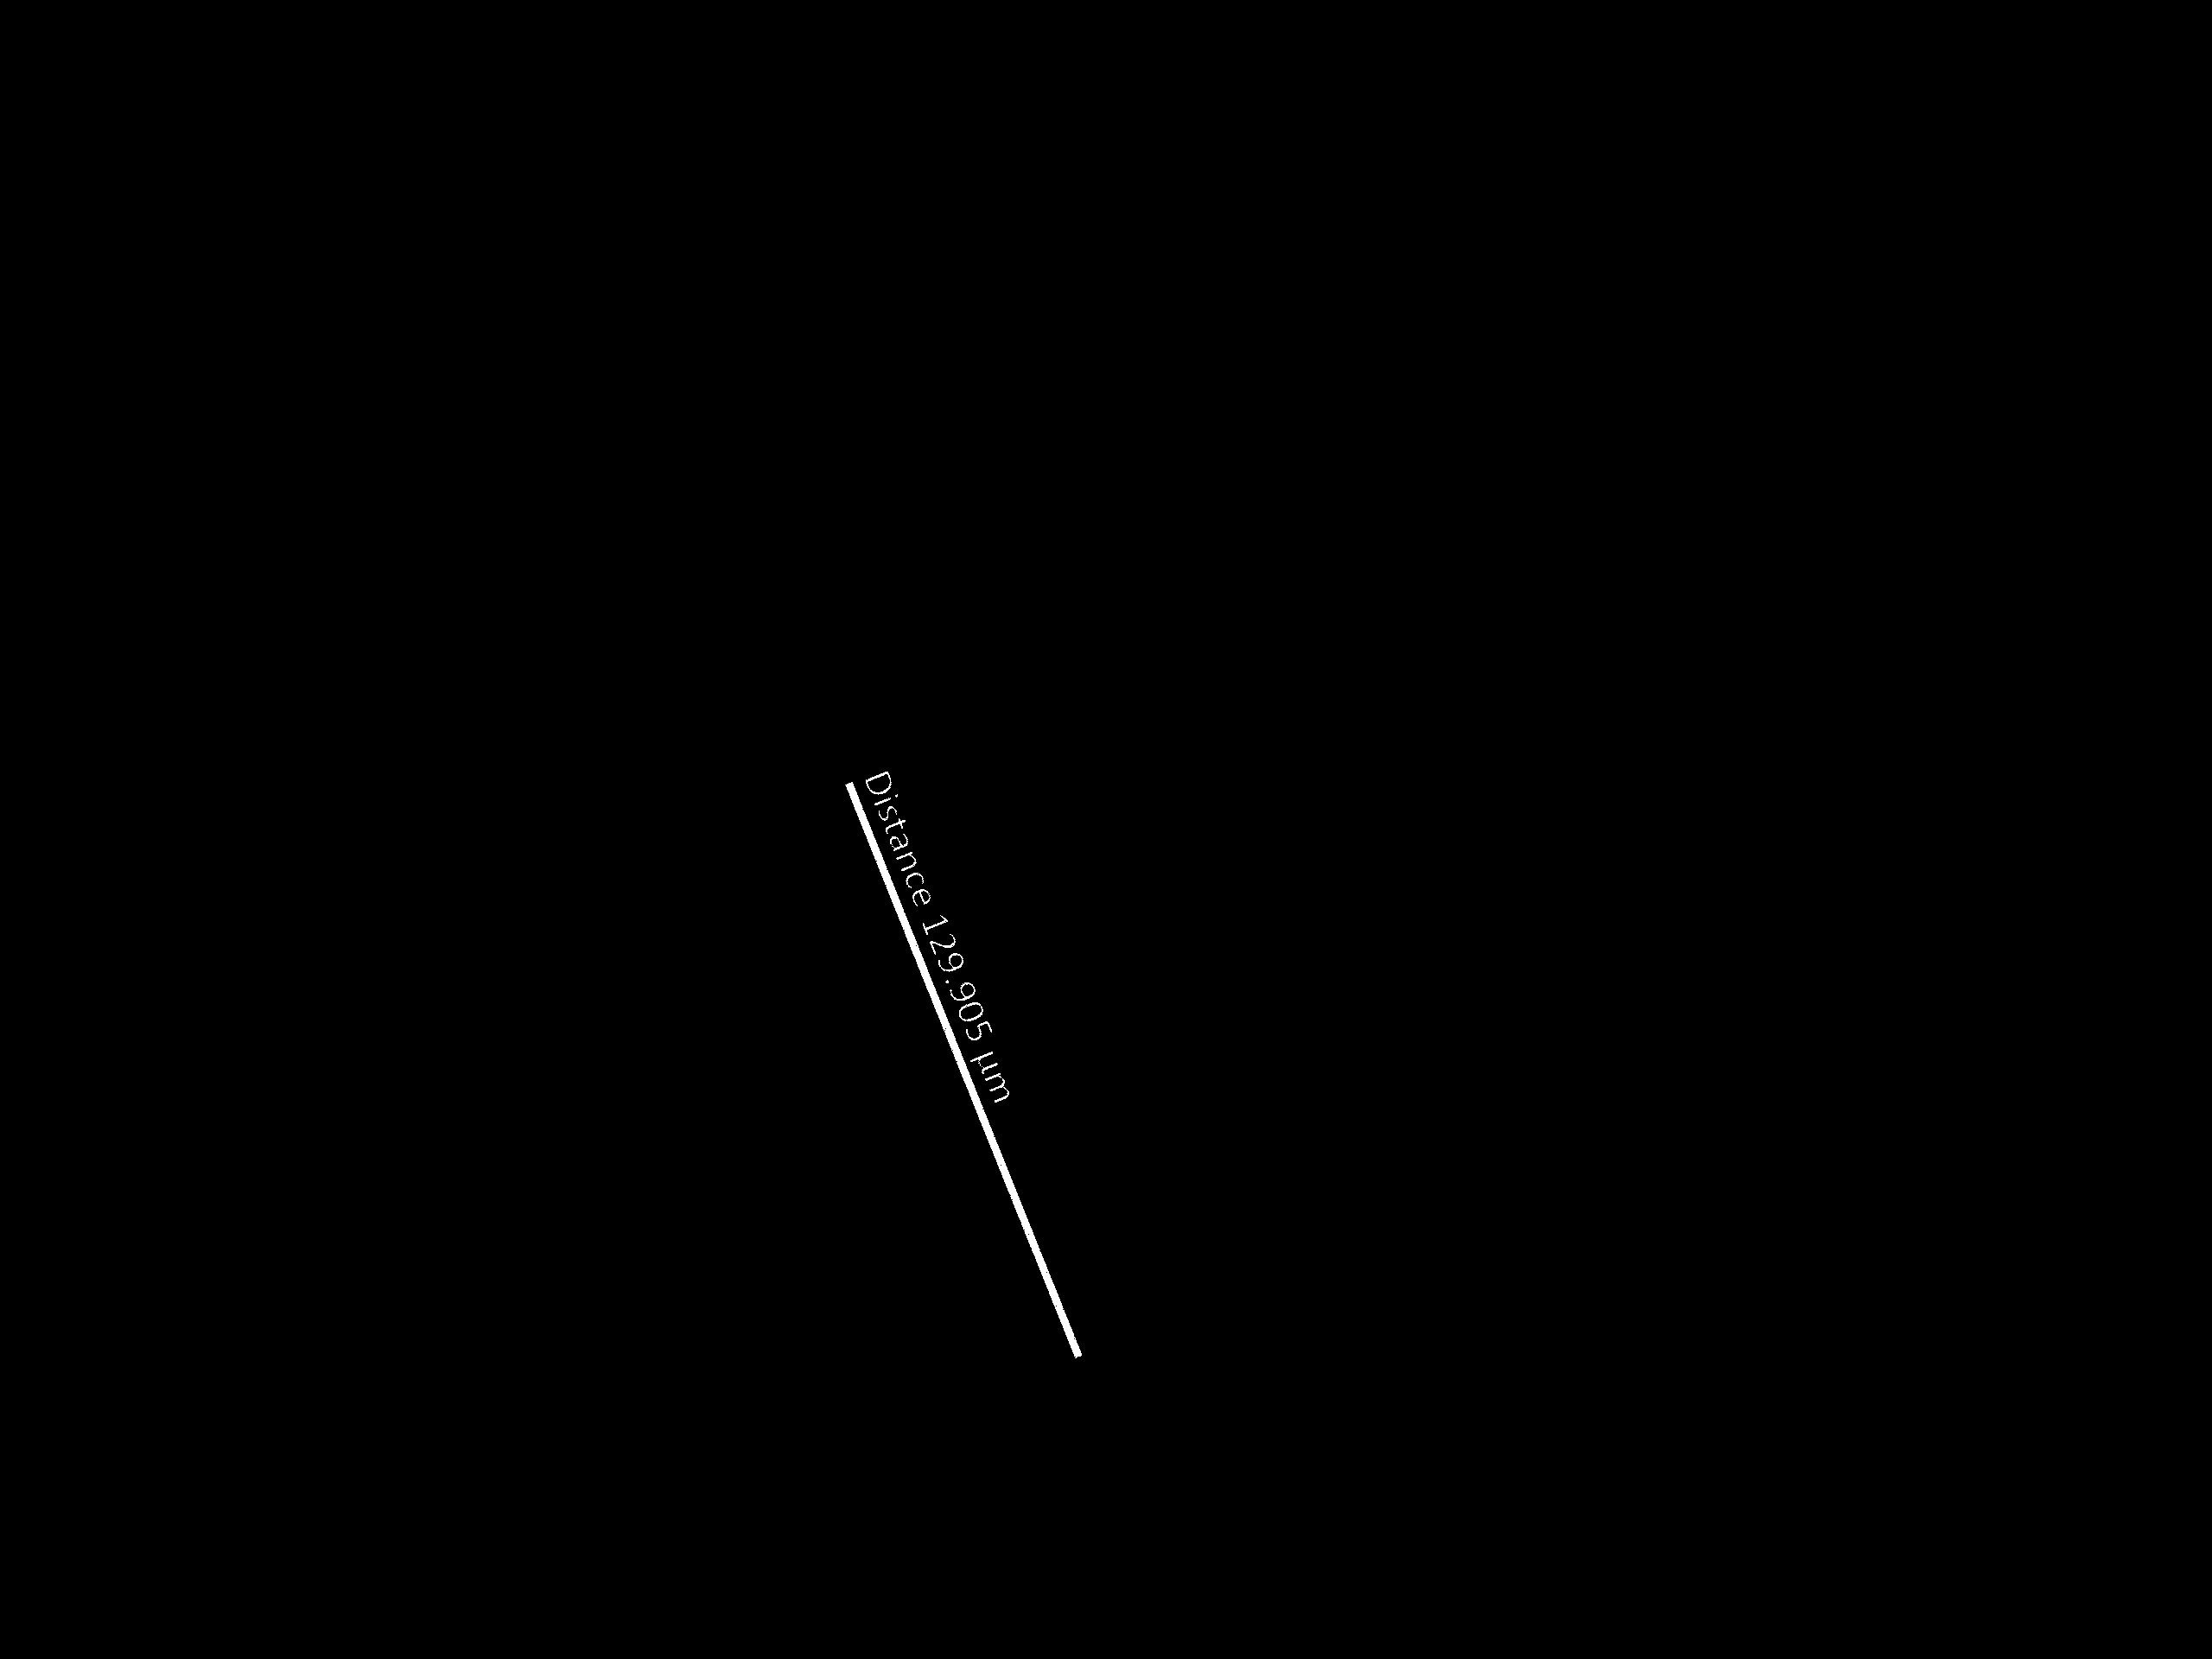

## Micrometers/pixel conversion 2.5x

In [207]:
# read in image & convert to HSV values
img2 = cv2.imread("Images/GRAPHENE/bl_2/bl_a_2.5x.jpg")
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create a mask for red values only & write to B&W photo
mask2 = cv2.inRange(hsv, (155, 50, 50), (180, 255, 255))
mask2 = cv2.blur(mask2, (10,10))
cv2.imwrite('Images/GRAPHENE/bl_2/bl_a_2.5x_BW.jpg', mask2)

# detect circles in image using HoughCricles
detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,\
                                   param1 = 50, param2 = 30, minRadius = 250,\
                                   maxRadius = 270)

if detected_circles is not None:
    
    radius = []
    for pt in detected_circles[0,:]:
        radius = pt[2]
        
    detected_circles = np.uint16(np.around(detected_circles))
    for pt in detected_circles[0,:]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img2, (a,b), r, (0,255,0), 2)

cv2.imwrite('Images/GRAPHENE/bl_2/bl_a_2.5x_crc.jpg', img2)

# width of circle calculation
width2 = radius*2

# pixel to micrometer ratio
p2mm = 454.911/width2
print('2.5x: ', p2mm, 'micrometers/pixel')

2.5x:  0.876514450867052 micrometers/pixel
